In [2]:
import time
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.manifold import TSNE 
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram

from Agnes import Agnes
from utils import report
from DBscan import DBscan 

import warnings
warnings.filterwarnings("ignore") 
cmap = 'Spectral'

In [174]:
data = pd.read_csv('datset.csv') 
cat = ['OverTime', 'MaritalStatus', 'JobRole', 'Gender', 'EducationField', 'Department', 'BusinessTravel', 'Attrition']
data = data.drop(['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], axis=1)
for i in cat:
    data[i] = (data[i].astype('category').cat.codes).apply(np.int64)
X, y = data.drop(['Attrition'], axis=1), data['Attrition']

# TSNE

In [175]:
tsne_2d = TSNE(random_state=42, n_components=2, verbose=0, perplexity=40, n_iter=2000, learning_rate='auto').fit_transform(X)
tsne_3d = TSNE(random_state=42, n_components=3, verbose=0, perplexity=40, n_iter=2000, learning_rate='auto').fit_transform(X) 

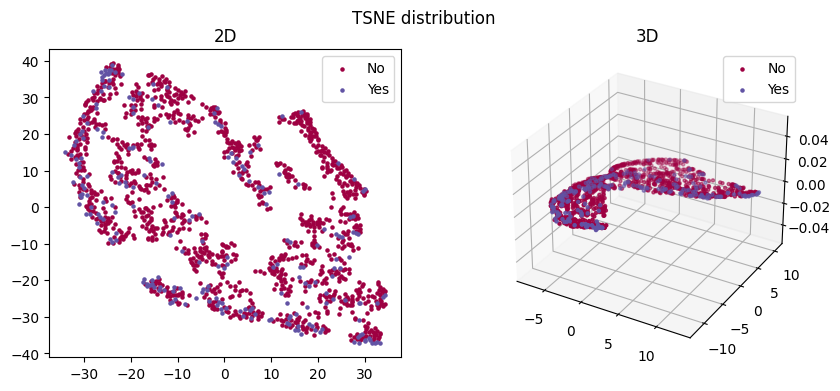

In [176]:
fig = plt.figure()
fig.set_size_inches(10, 4)
colors = ['#9e0142', '#6253a4']
labels = ['No', 'Yes']

ax1 = fig.add_subplot(1, 2, 1)
groups = pd.DataFrame(tsne_2d, columns=['x', 'y']).assign(category=y).groupby('category')
for name, points in groups:
    ax1.scatter(points.x, points.y, s=5, cmap=cmap, c=colors[name], label=labels[name])
ax1.legend()
ax1.set_title('2D')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
groups = pd.DataFrame(tsne_3d, columns=['x', 'y', 'z']).assign(category=y).groupby('category')
for name, points in groups:
    ax2.scatter(points.x, points.y, s=5, cmap=cmap, c=colors[name], label=labels[name])
ax2.legend()
ax2.set_title('3D')

fig.suptitle('TSNE distribution')
plt.show()

# PCA


In [177]:
reduced_2d = PCA(2).fit_transform(X) 
reduced_3d = PCA(3).fit_transform(X) 

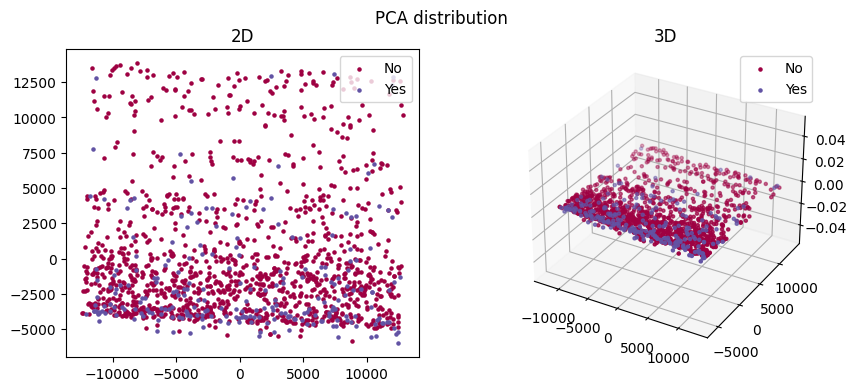

In [178]:
fig = plt.figure()
fig.set_size_inches(10, 4)
colors = ['#9e0142', '#6253a4']
labels = ['No', 'Yes']

ax1 = fig.add_subplot(1, 2, 1)
groups = pd.DataFrame(reduced_2d, columns=['x', 'y']).assign(category=y).groupby('category')
for name, points in groups:
    ax1.scatter(points.x, points.y, s=5, cmap=cmap, c=colors[name], label=labels[name])
ax1.legend()
ax1.set_title('2D')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')
groups = pd.DataFrame(reduced_3d, columns=['x', 'y', 'z']).assign(category=y).groupby('category')
for name, points in groups:
    ax2.scatter(points.x, points.y, s=5, cmap=cmap, c=colors[name], label=labels[name])
ax2.legend()
ax2.set_title('3D')

fig.suptitle('PCA distribution')
plt.show()

# TODOs

In [ ]:
from sklearn.cluster import AgglomerativeClustering as Agnes
agnes = Agnes(2)
clustering = agnes.fit(X)

In [ ]:
report(y, list(clustering.labels_)) 

In [ ]:
'''dendrogram(X, labels=predicted, link_color_func=lambda x: 'black')
plt.title('AGNES Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show() '''

In [ ]:
# TODO 
# Agnes
    # dendogram
    # try matrix and divide and conquer in Agnes

# DBscan
    # max of each for grid 2d
    # i+1
    # more grid on DBscan

# other metrics - l'indice de silhouette ou la distance intercluster